# 3.带拟合线的散点图

如果遇到在matplotlib和seaborn中无法显示中文或负号的问题可参考：https://www.jianshu.com/p/914b5f4ce6bf

最佳拟合线（或“趋势”线）是一条直线，它被认为是最能代表散点图上的数据的直线

这条线线可以通过一些散点，不通过任何散点或通过所有散点

拟合线可以帮助我们找出并不太明显的趋势

## 3.1 自定义数据集上尝试

### 3.1.1 导入需要的绘图库

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### 3.1.2 简单的最佳拟合线

**sns.lmplot()**

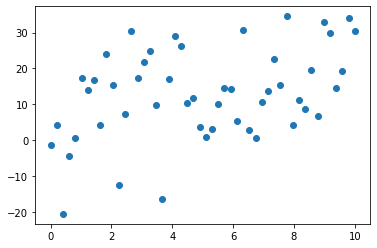

In [6]:
X1 = np.linspace(0,10,50)
y = 2 * X1 + 5 + np.random.randn(50) * 10

plt.scatter(X1, y)
plt.show()

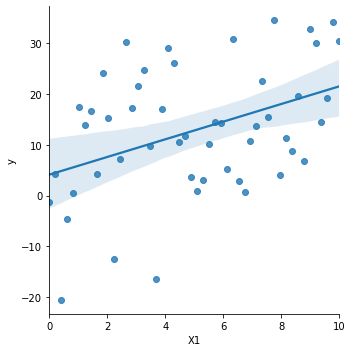

In [9]:
# sns.lmplot方法必须使用 data+字符串的形式传入参数，且data为DataFrame
data = pd.DataFrame({'X1':X1, 'y':y})
gridobj = sns.lmplot('X1', 'y', data=data)

### 3.1.3 将点分类拟合

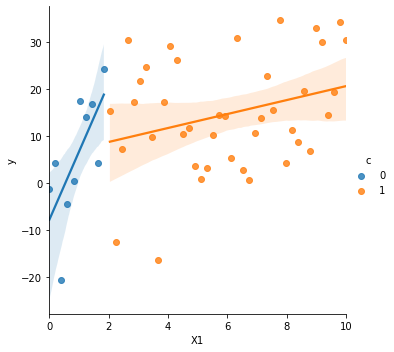

In [10]:
c = [0]*10 + [1]*40
data = pd.DataFrame({'X1':X1, 'y':y, 'c':c})
gridobj = sns.lmplot('X1','y'
                     , data=data
                     , hue='c'
                    #  , legend= False # 自带的legend只能显示参数c的数值，默认为True
                    )

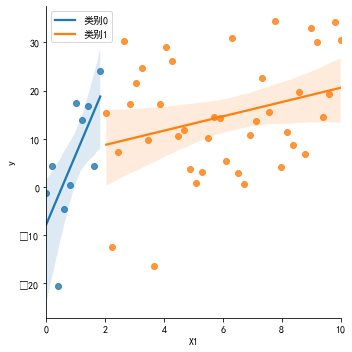

In [13]:
plt.rcParams['font.sans-serif'] = ['Simhei']
c = [0]*10 + [1]*40
data = pd.DataFrame({'X1':X1, 'y':y, 'c':c})
gridobj = sns.lmplot('X1','y'
                     , data=data
                     , hue='c'
                     , legend= False # 自带的legend只能显示参数c的数值，图例是点，默认为True
                    )
plt.legend(['类别0', '类别1']) # 也可以使用plt.legend来设置图例，这里的图例是线
plt.show()

## 3.2 大神的原图

### 3.2.1 认识数据

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv", thousands=',')

In [5]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [7]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [8]:
# 每个字段对应的中文
[*zip(df.columns.values, np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

In [9]:
# 汽缸数量都有哪些
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

### 3.2.2 绘制图像

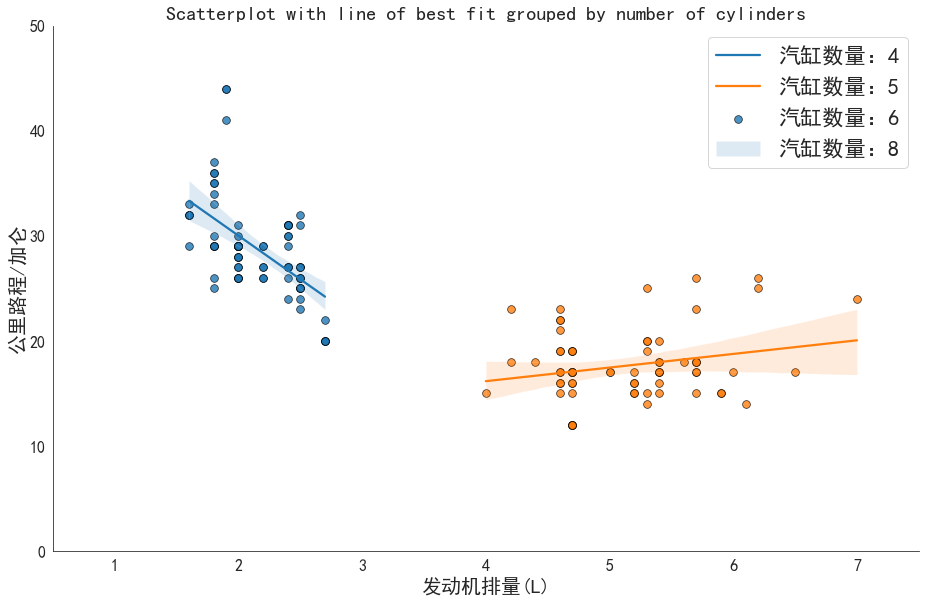

In [13]:
# 准备数据
df_select = df.loc[df.cyl.isin([4,8]),:]

# 绘制图像
sns.set_style('white') # 设立风格

gridobj = sns.lmplot(
                     x='displ' # 横坐标：发动机排量
                     , y='hwy' # 纵坐标：公路里程/加仑
                     ,data=df_select
                     , hue='cyl' # 分类
                     , height=8  # 图像的高度
                     , aspect=1.6 # 图像的纵横比，aspect*height就是图像长度
                     , palette='tab10' # 色板
                     , legend=False
                     # 其他绘图参数
                     , scatter_kws=dict(
                                         s=60   # 点的大小
                                         , linewidths=.7 # 线宽
                                         , edgecolors='black' # 边框颜色
                                        )
                     )

# 装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.xlabel('发动机排量(L)', fontsize=20)
plt.ylabel('公里路程/加仑', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["汽缸数量：4",'汽缸数量：8'], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

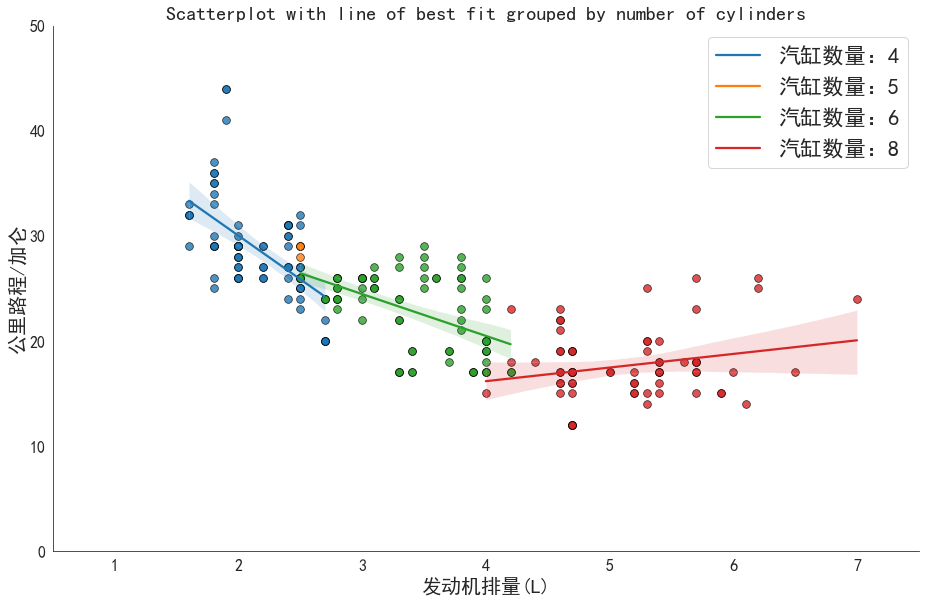

In [15]:
# 汽缸数量一共有4种类型
# 一图四线
# 准备数据
df_select = df.loc[df.cyl.isin([4,8]),:]

# 绘制图像
sns.set_style('white') # 设立风格

gridobj = sns.lmplot(
                     x='displ' # 横坐标：发动机排量
                     , y='hwy' # 纵坐标：公路里程/加仑
                    #  ,data=df_select
                     , data=df  # 使用全部的数据
                     , hue='cyl' # 分类
                     , height=8  # 图像的高度
                     , aspect=1.6 # 图像的纵横比，aspect*height就是图像长度
                     , palette='tab10' # 色板
                     , legend=False
                     # 其他绘图参数
                     , scatter_kws=dict(
                                         s=60   # 点的大小
                                         , linewidths=.7 # 线宽
                                         , edgecolors='black' # 边框颜色
                                        )
                     )

# 装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.xlabel('发动机排量(L)', fontsize=20)
plt.ylabel('公里路程/加仑', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["汽缸数量：4", '汽缸数量：5','汽缸数量：6','汽缸数量：8'], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### 3.2.3 让每个类型的散点显示在不同的图像上

**重要参数**

col：表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行

col_wrap：当参数col有效的时候有效，表示每行最多显示col_wrap个图

#### 一图一线 在一排

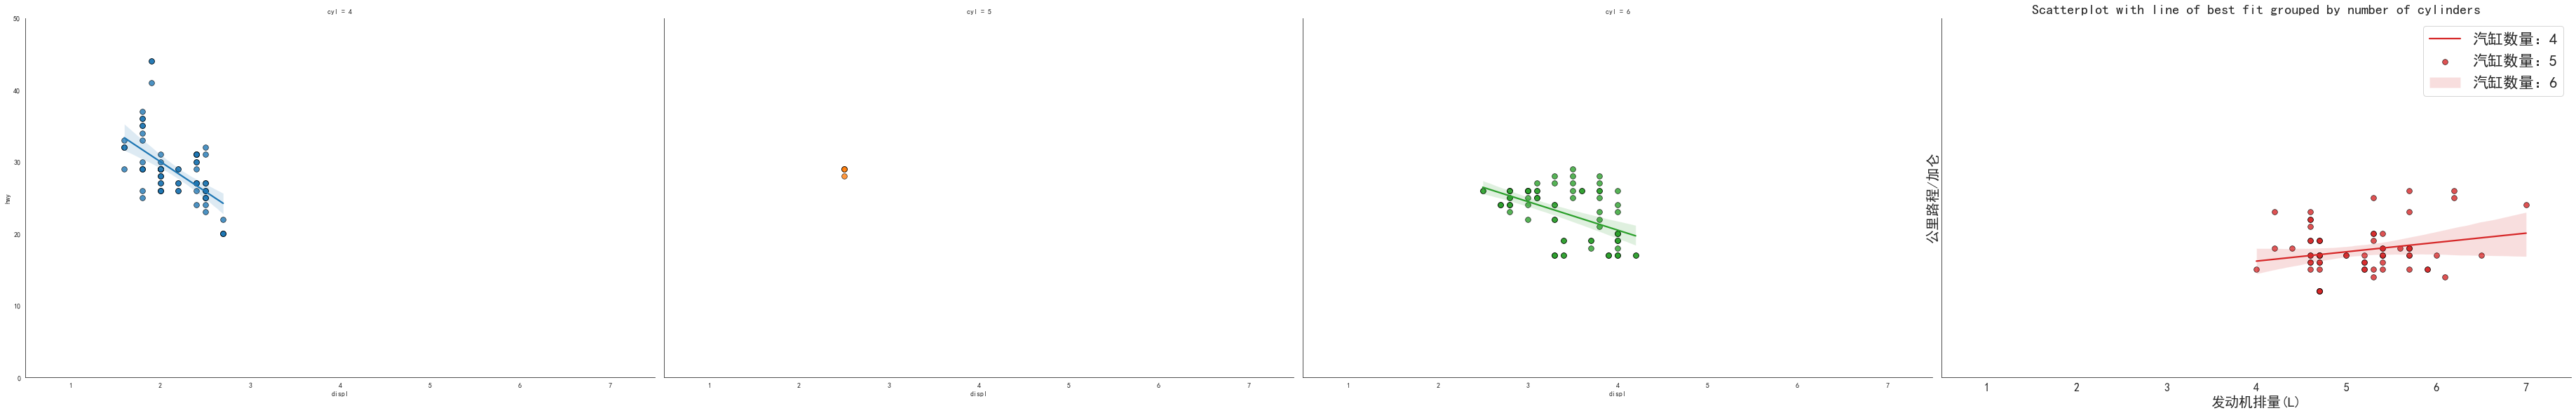

In [16]:
# 准备数据
df_select = df.loc[df.cyl.isin([4,8]),:]

# 绘制图像
sns.set_style('white') # 设立风格

gridobj = sns.lmplot(
                     x='displ' # 横坐标：发动机排量
                     , y='hwy' # 纵坐标：公路里程/加仑
                    #  ,data=df_select
                     , data=df  # 使用全部的数据
                     , hue='cyl' # 分类
                     , height=8  # 图像的高度
                     , aspect=1.6 # 图像的纵横比，aspect*height就是图像长度
                     , palette='tab10' # 色板
                     , legend=False
                     , col='cyl' # 表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行
                     # 其他绘图参数
                     , scatter_kws=dict(
                                         s=60   # 点的大小
                                         , linewidths=.7 # 线宽
                                         , edgecolors='black' # 边框颜色
                                        )
                     )

# 装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.xlabel('发动机排量(L)', fontsize=20)
plt.ylabel('公里路程/加仑', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["汽缸数量：4", '汽缸数量：5','汽缸数量：6','汽缸数量：8'], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

#### 一图一线，一排三图

这里用col_wrap参数来指定一行有多少图

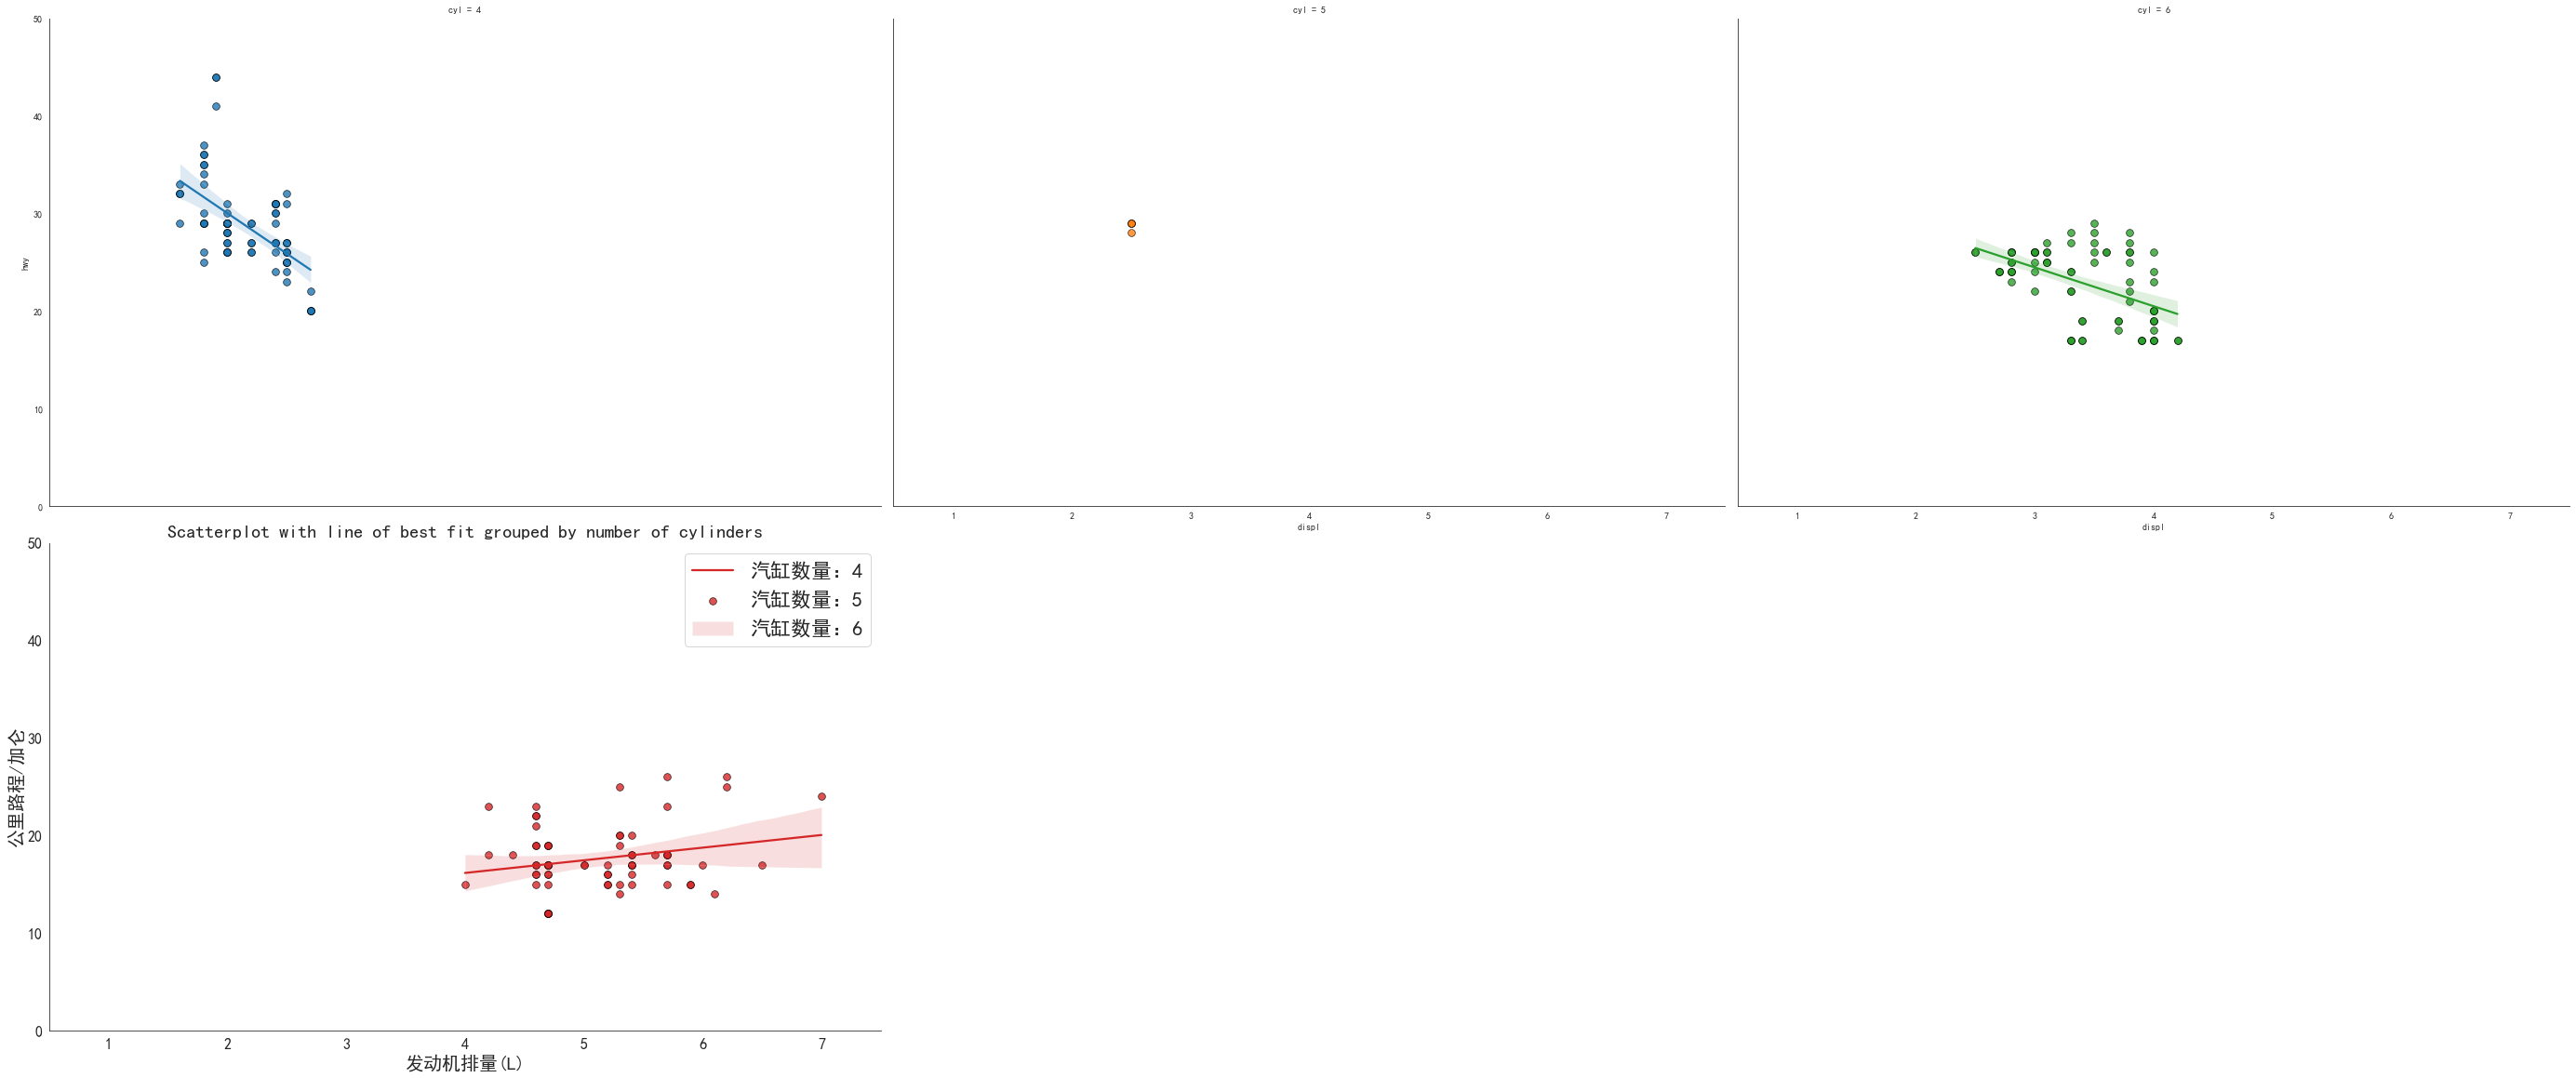

In [17]:
# 准备数据
df_select = df.loc[df.cyl.isin([4,8]),:]

# 绘制图像
sns.set_style('white') # 设立风格

gridobj = sns.lmplot(
                     x='displ' # 横坐标：发动机排量
                     , y='hwy' # 纵坐标：公路里程/加仑
                    #  ,data=df_select
                     , data=df  # 使用全部的数据
                     , hue='cyl' # 分类
                     , height=8  # 图像的高度
                     , aspect=1.6 # 图像的纵横比，aspect*height就是图像长度
                     , palette='tab10' # 色板
                     , legend=False
                     , col='cyl' # 表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行
                     , col_wrap=3 # 当参数col有效的时候有效，表示每行最多显示col_wrap个图
                     # 其他绘图参数
                     , scatter_kws=dict(
                                         s=60   # 点的大小
                                         , linewidths=.7 # 线宽
                                         , edgecolors='black' # 边框颜色
                                        )
                     )

# 装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.xlabel('发动机排量(L)', fontsize=20)
plt.ylabel('公里路程/加仑', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["汽缸数量：4", '汽缸数量：5','汽缸数量：6','汽缸数量：8'], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()